In [5]:
# !pip install keras==2.3.1
# !pip install --upgrade pip
# !pip install tensorflow==1.8.0
# !pip install tensorflow-gpu==1.8.0
# !pip list
# !pip uninstall tensorflow -y
!pip install -r requirements.txt
# !ls


     |████████████████████████████████| 132 kB 313 kB/s            
     |████████████████████████████████| 53 kB 1.6 MB/s            
     |████████████████████████████████| 145 kB 1.7 MB/s            
     |████████████████████████████████| 97 kB 3.6 MB/s            
     |████████████████████████████████| 20.3 MB 8.5 MB/s            
     |████████████████████████████████| 7.4 MB 39.7 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 100.1 MB 13.1 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 4.3 MB 12.8 MB/s            
     |████████████████████████████████| 2.9 MB 15.9 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 121 kB 30.7 MB/s            
     |████████████████████████████████| 125 kB 36.8 MB/s            
     |████████████████████████████████| 86 kB 8.7 MB/s             
     |████████████████████████████████| 339 kB 22.4 MB

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

AttributeError: module 'tensorflow' has no attribute 'config'

In [2]:
from tensorflow import keras
mnist = keras.datasets.mnist
(imgTrain, labelTrain), (imgTest, labelTest) = mnist.load_data()

ImportError: cannot import name 'keras'

In [40]:
from tensorflow import keras
(imgTrain, labelTrain), (imgTest, labelTest) = keras.datasets.mnist.load_data()

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.
/home/kk/jupyter/jupyter_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kk/jupyter/jupyter_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kk/jupyter/jupyter_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kk/jupyter/jupyter_env/lib/pytho

In [2]:
(imgTrain,labelTrain),(imgTest,labelTest) = mnist.load_data()

In [3]:
print('train img',imgTrain.shape)
print('train label',labelTrain.shape)
print('test img',imgTest.shape)
print('test label',labelTest.shape)

train img (60000, 28, 28)
train label (60000,)
test img (10000, 28, 28)
test label (10000,)


In [4]:
import matplotlib.pyplot as plt
def plt_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2,2)
  plt.imshow(image,cmap='binary')
  plt.show()

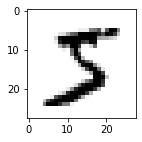

In [5]:
plt_image(imgTrain[0])

In [6]:
Train4D = imgTrain.reshape(imgTrain.shape[0],28,28,1).astype('float32')
Test4D = imgTest.reshape(imgTest.shape[0],28,28,1).astype('float32')
Train4D_normalize = Train4D / 255
Test4D_normalize = Test4D / 255

In [7]:
from keras.utils import np_utils
TrainOneHot = np_utils.to_categorical(labelTrain)
TestOneHot = np_utils.to_categorical(labelTest)
# labelTrain[:5]
# TrainOneHot[:5]

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [9]:
def get_model():
        model = Sequential()
        model.add(Conv2D(filters=32, 
                kernel_size=(5,5),
                padding='same',
                input_shape=(28,28,1),
                activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Flatten())
        model.add(Dense(1500,activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(10,activation='softmax'))
        return model

In [10]:
model = get_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              9409500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                15010     
Total params: 9,425,342
Trainable params: 9,425,342
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy',
      optimizer='adam',metrics=['accuracy'])

In [12]:
trainHistory = model.fit(x=Train4D_normalize, y=TrainOneHot, validation_split=0.2, epochs=10,batch_size=500, verbose=1)
# trainHistory = model.fit(x=Train4D_normalize, y=TrainOneHot, validation_split=0.2, epochs=10, batch_size=500)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 299us/step - loss: 0.3066 - acc: 0.9078 - val_loss: 0.1020 - val_acc: 0.9704
Epoch 2/10
48000/48000 [==============================] - 14s 294us/step - loss: 0.0873 - acc: 0.9741 - val_loss: 0.0603 - val_acc: 0.9828
Epoch 3/10
48000/48000 [==============================] - 14s 288us/step - loss: 0.0542 - acc: 0.9838 - val_loss: 0.0508 - val_acc: 0.9848
Epoch 4/10
48000/48000 [==============================] - 14s 290us/step - loss: 0.0412 - acc: 0.9878 - val_loss: 0.0435 - val_acc: 0.9868
Epoch 5/10
48000/48000 [==============================] - 14s 286us/step - loss: 0.0315 - acc: 0.9901 - val_loss: 0.0478 - val_acc: 0.9860
Epoch 6/10
48000/48000 [==============================] - 14s 290us/step - loss: 0.0266 - acc: 0.9915 - val_loss: 0.0389 - val_acc: 0.9888
Epoch 7/10
48000/48000 [==============================] - 14s 290us/step - loss: 0.0220 - acc: 0.9927 - val_loss: 0.

In [13]:
def show_trainHistory(train,validation):
  plt.plot(trainHistory.history[train])
  plt.plot(trainHistory.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('times')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

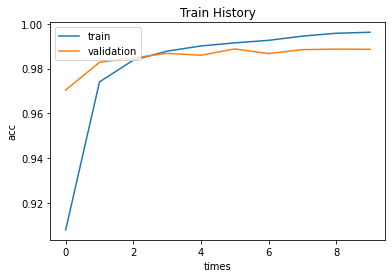

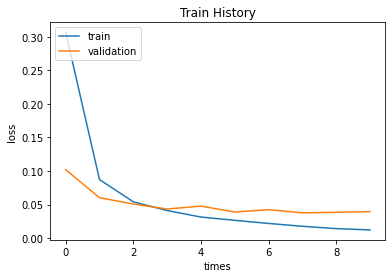

In [15]:
show_trainHistory('acc','val_acc')
show_trainHistory('loss','val_loss')

In [16]:
scores = model.evaluate(Test4D_normalize,TestOneHot)
scores

10000/10000 [==============================] - 1s 148us/step


[0.03397061725149906, 0.9889]

In [17]:
prediction = model.predict_classes(Test4D_normalize)
prediction[0]

7

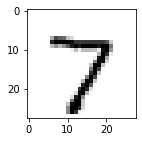

In [18]:
plt_image(imgTest[0])

In [19]:
import pandas as pd
pd.crosstab(labelTest,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,1,0,1,2,0,2,0
1,0,1132,1,1,0,0,0,0,1,0
2,1,1,1020,2,0,0,0,4,4,0
3,0,0,0,1006,0,2,0,0,2,0
4,0,2,0,0,969,0,1,0,2,8
5,2,0,0,10,0,875,4,0,1,0
6,5,2,0,1,1,2,946,0,1,0
7,1,2,5,4,0,0,0,1014,1,1
8,1,0,2,2,0,0,0,0,966,3


In [20]:
model.save('model.h5') 

model.save_weights("model_weights.h5")
print("存取成功")

try:
    model.load_weights("model_weights.h5")
    print("載入模型成功!繼續訓練模型")
except:
    print("載入模型失敗!繼續訓練新的模型")


存取成功
載入模型成功!繼續訓練模型


In [21]:
!unzip simg.zip

unzip:  cannot find or open simg.zip, simg.zip.zip or simg.zip.ZIP.


In [22]:
from PIL import Image
import numpy as np
from keras.models import load_model
model = load_model('model.h5')

In [23]:
import os 
add = []
bigdata = "simg/"
save=os.listdir(bigdata)
save.sort()

FileNotFoundError: [Errno 2] No such file or directory: 'simg/'

In [ ]:
for picture in save:
  full_path = os.path.join(bigdata,picture)
  if not os.path.isdir(full_path):
    im = Image.open(full_path).convert('L')
    for i in range(im.size[0]):
      for j in range(im.size[1]):
        if(im.getpixel((i,j))>128):  
          im.putpixel((i,j),255) 
        else: 
          im.putpixel((i,j),0) 
    data = np.array(im.getdata()) 
    data=np.abs(data-255)
    add.append(data) 

In [ ]:
import matplotlib.pyplot as plt
label = [0,1,2,3,4,5,6,7,8,9] 
for i in range(10): 
    a=add[i].reshape(28,28)
    res=model.predict(add[i].reshape(1,28,28,1))
    idx = np.argmax(res)
    print("predict=",label[idx])
    plt.imshow(a,cmap='binary')
    plt.show()